## Portal Assets Analysis
Before importing the csv file, clean it and save as csv-utf8
Clean: reformat create and update date columns to be actual dates; standardize data_provided_by column as best as you can
Remove any 'test' datasets before importing (search 'name' and 'description' for "test", but look out for lead testing datasets).  Remove any gis datasets since the metadata is imported (easiest thing is to search the licenses, all are type 'href').  This code ignores private datasets that have public derived views (like charts and maps).

In [1]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#This shows your working directory:
#os.getcwd()

#Read the csv into a dataframe. If your path name has a folder starting with 'u', you'll need double '\'
df = pd.read_csv('Documents\\UW\\ODL\\code\\asset24june.csv')

# check the data frame info
#print(df.info())

### Rename Columns
Replaces column names in place

In [3]:
df.rename({"URL": "url",
"U ID": "uid",
"Public": "public",
"Derived View": "derived",
"Parent UID": "parentUid",
"Domain": "domain",
"Type": "type",
"Name": "name",
"Description": "description",
"Visits": "visits",
"Creation Date": "creationDate",
"Last Update Date (data)": "lastUpdateData",
"Category": "category",
"Keywords": "keywords",
"Downloads": "downloads",
"Owner": "owner",
"Contact Email": "contactEmail",
"License": "license",
"Publication Stage": "publicationStage",
"Published Version Name": "publishedVersionName",
"Published Version UID": "publishedVersionUid",
"data_provided_by": "data_provided_by",
"3": "notes3",
"Period of Time": "periodOfTime",
"4": "notes4",
"Publishing Department": "publishingDepartment",
"routing_approval": "routing_approval",
"6": "notes6",
"api_endpoint": "api_endpoint",
"5": "notes5",
"2": "notes2",
"Posting Frequency": "postingFreq",
"1": "notes1",
"source_link": "source_link",
"owner_uid": "owner_uid",
"View Moderation Status": "viewModerationStatus",
"provenance": "provenance",
"capabilities": "capabilities",
"supportedQueryFormats": "supportedQueryFormats",
"htmlPopupType": "htmlPopupType",
"copyrightText": "copyrightText",
"geometryType": "geometryType",
"Spatial Reference wkid": "spatialRefwkid",
"Source": "source",
"fields": "fields",
"displayField": "displayField",
"Last Update": "lastUpdate",
"Endpoint": "endPoint",
"Public Access Level": "publicAccessLevel",
"Geographic Coverage": "geographicCoverage",
"Unique Identifier": "uniqueIdentifier",
"Publisher": "publisher",
"Homepage": "homepage",
"Theme": "theme",
"Issued": "issued",
"Contact Name": "contactName",
"Originator": "originator",
"Metadata Language": "metadataLang",
"Data Definition": "dataDefinition",
"Data Frequency": "dataFreq",
"Data Source": "dataSource",
"Target Rationale": "targetRational",
"Level of Influence": "levelOfInfluence",
"Contact Email (custom)": "contactEmailCustom",
"Program Code": "programCode",
"Contact Point": "contactPoint",
"Bureau Code": "bureauCode"}, axis=1, inplace=True)

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 67 columns):
url                      3575 non-null object
uid                      3575 non-null object
public                   3575 non-null object
derived                  3575 non-null object
parentUid                2158 non-null object
domain                   3575 non-null object
type                     3575 non-null object
name                     3574 non-null object
description              2430 non-null object
visits                   3575 non-null float64
creationDate             3575 non-null object
lastUpdateData           3575 non-null object
category                 2473 non-null object
keywords                 2341 non-null object
downloads                3575 non-null float64
owner                    3575 non-null object
contactEmail             700 non-null object
license                  1316 non-null object
publicationStage         3575 non-null object
publishedVersionNa

In [50]:
df.head()

,url,uid,public,derived,parentUid,domain,type,name,description,visits,...,metadataLang,dataDefinition,dataFreq,dataSource,targetRational,levelOfInfluence,contactEmailCustom,programCode,contactPoint,bureauCode
0,https://data.wa.gov/d/5cqd-fjdi,5cqd-fjdi,False,True,yizh-eh8b,data.wa.gov,form,Simple Data Share Register,Sometimes employees of two different agencies ...,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://data.wa.gov/d/9jds-te9m,9jds-te9m,True,True,yizh-eh8b,data.wa.gov,filter,DSA Register - PublicView,Sometimes employees of two different agencies ...,171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://data.wa.gov/d/bu6u-rj74,bu6u-rj74,False,True,yizh-eh8b,data.wa.gov,filter,DSA Register - AuditView,Sometimes employees of two different agencies ...,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://data.wa.gov/d/yizh-eh8b,yizh-eh8b,False,False,NaN,data.wa.gov,dataset,Data Sharing Agreements Register,Sometimes employees of two different agencies ...,23.0,...,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://data.wa.gov/d/x5aq-6f3n,x5aq-6f3n,True,False,NaN,data.wa.gov,href,Historical Washington Aerial Imagery,"Aerial imagery of the state of Washington, fro...",683.0,...,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add a column showing base asset (parent asset)

In [5]:
df['allParentUid'] = np.nan #Adds empty column

#Tried to do it all at once, doesn't work:
#df['allParentUid'] = df.apply(
#    lambda row: row['uid'] if np.isnan(row['parentUid']) else row['parentUid'],
#    axis=1
#)

df['allParentUid'].fillna(df['parentUid'], inplace=True) #This works replacing NaN with parentUid
df.loc[(pd.isnull(df.allParentUid)), 'allParentUid'] = df.uid #This works to put all the uids into allParentUid- but is this just a copy?

#df.head()

### Fill NaN vlaues in 'description' with 'null' to allow indexing

In [6]:
df['description'].fillna('null', inplace=True)

### Look at distribution of types of all assets (public and not)
Uses the matplotlib package to count the occurances of each type

Text(0.5, 0, 'Frequency')

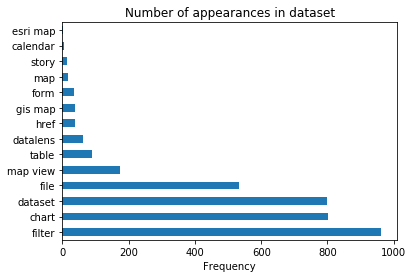

In [7]:
#mask = df[df['public'] == 1] #public is boolean so it 1=true
#plot = mask.plot.pie(y='type', figsize=(5, 5))

#Plot a histogram of frequencies
df.type.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

### Plot the top five types of datasets and include an 'others' type as well

Text(0, 0.5, '')

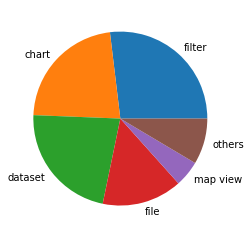

In [28]:
pltdf = df.type.value_counts() #uses matlibplot to count rows for each type

pltdf = pd.DataFrame({'type':pltdf.index, 'counts':pltdf.values}) #Converts the series to a dataframe

pltdf2 = pltdf[:5].copy() #Put top 5 types in a new dataframe


# Takes the less common types and adds those counts into a value named others.
new_row = pd.DataFrame(data = {
    'type' : ['others'],
    'counts' : [pltdf['counts'][5:].sum()]
})


pltdf2 = pd.concat([pltdf2, new_row]) #Add the 'others' value to the top 5 dataframe

#https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html
#https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
#http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


#plot the types
pltdf2.plot(y='counts', kind='pie', labels=pltdf2.type, legend=False)
plt.ylabel('') #Gets rid of the "Counts lable"




In [10]:
#pie chart of all the types
#df.type.value_counts().plot(kind='pie')
#plt.axis('equal')
#plt.title('Number of appearances in dataset')


### Create a dataframe of public assets

In [56]:
mask = df[df['public'] == 1]
dfpub = mask[["url",
"uid",
"public",
"type",
"name",
"description",
"visits",
"creationDate",
"lastUpdateData",
"category",
"keywords",
"downloads",
"owner",
"contactEmail",
"license",
"publicationStage",
"data_provided_by",
"periodOfTime",
"postingFreq",
"source_link",
"owner_uid",
"source",
"contactName",
"originator",
"metadataLang",
"allParentUid"]]
print(dfpub.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 1 to 3662
Data columns (total 26 columns):
url                 2168 non-null object
uid                 2168 non-null object
public              2168 non-null object
type                2168 non-null object
name                2168 non-null object
description         2168 non-null object
visits              2168 non-null float64
creationDate        2168 non-null object
lastUpdateData      2168 non-null object
category            1420 non-null object
keywords            1416 non-null object
downloads           2168 non-null float64
owner               2168 non-null object
contactEmail        554 non-null object
license             457 non-null object
publicationStage    2168 non-null object
data_provided_by    788 non-null object
periodOfTime        195 non-null object
postingFreq         294 non-null object
source_link         530 non-null object
owner_uid           2168 non-null object
source              0 non-null objec

### Types of Public datasets

Text(0.5, 1.0, 'Public Assets')

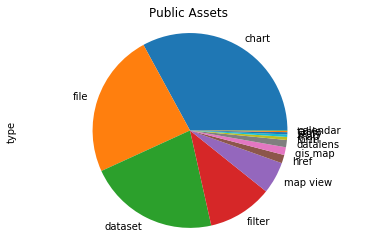

In [57]:
dfpub.type.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Public Assets')

### Datasets

In [58]:
mask = df[df['type'] == 'dataset']
mask = mask[mask['public'] == 1]
dfpubd = mask[["url",
"uid",
"public",
"type",
"name",
"description",
"visits",
"creationDate",
"lastUpdateData",
"category",
"keywords",
"downloads",
"owner",
"contactEmail",
"license",
"publicationStage",
"data_provided_by",
"periodOfTime",
"postingFreq",
"source_link",
"owner_uid",
"source",
"contactName",
"originator",
"metadataLang",
"allParentUid"]]
print(dfpubd.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 18 to 3585
Data columns (total 26 columns):
url                 470 non-null object
uid                 470 non-null object
public              470 non-null object
type                470 non-null object
name                470 non-null object
description         470 non-null object
visits              470 non-null float64
creationDate        470 non-null object
lastUpdateData      470 non-null object
category            334 non-null object
keywords            332 non-null object
downloads           470 non-null float64
owner               470 non-null object
contactEmail        306 non-null object
license             150 non-null object
publicationStage    470 non-null object
data_provided_by    291 non-null object
periodOfTime        131 non-null object
postingFreq         140 non-null object
source_link         194 non-null object
owner_uid           470 non-null object
source              0 non-null object
contactName  